In [5]:
import ipdb
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pylab as pylab
import cartopy
import cartopy.crs as ccrs
from utils import constants as cnst
from eod import msg
from utils import u_grid, u_interpolate as u_int
from utils import constants as cnst

pylab.rcParams['figure.figsize'] = (50., 50.)
%matplotlib inline

In [1]:
cd ..

/home/ck/pythonWorkspace/proj_CEH


In [8]:
file = cnst.TRMM5KM_FILE

In [25]:
trmm = xr.open_dataarray(file)
trmm = trmm[(trmm['time.hour'] >=15) & (trmm['time.hour'] <=16) &(
    trmm['time.year'] >= 2006) & (trmm['time.year'] <= 2010) & (trmm['time.month'] >= 6)]

trmm = trmm.sel(lat=slice(10, 20), lon=slice(-12, 12))

In [26]:
trmm

<xarray.DataArray 'p' (time: 97, lat: 348, lon: 728)>
[24574368 values with dtype=float64]
Coordinates:
  * lat      (lat) float64 10.04 10.07 10.1 10.13 ... 19.63 19.66 19.69 19.72
  * lon      (lon) float64 -10.1 -10.07 -10.04 -10.02 ... 10.24 10.27 10.3 10.33
  * time     (time) datetime64[ns] 2006-06-02T16:57:00 ... 2010-09-30T16:39:00

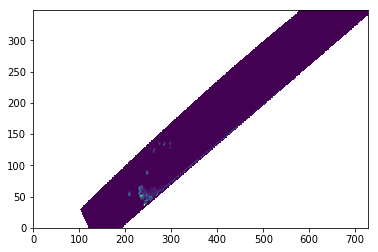

In [27]:
plt.pcolormesh(trmm.isel(time=0))

In [28]:
from scipy.ndimage.measurements import label
def blob_define(array, LTthresh=None, GTthresh=None, min_area=None, max_area=None, minmax_area=None):
    """

    :param array: 2d input array
    :param thresh: value threshold
    :param min_area: minimum number of pixels of the blob
    :param max_area: maximum number of pixels of the blob
    :param minmax_area: tuple indicating only blobs bigger than tuple[0] and smaller than tuple[1]
    :return: 2d array with labelled blobs
    """
    
    if LTthresh != None:
        array[array <= LTthresh] = 0  # T threshold maskout
    if GTthresh != None:
        array[array >= GTthresh] = 0  # T threshold maskout
        
    if (LTthresh==None) & (GTthresh==None):
        print('Please  provide LT or GT threshold')
        
    array[np.isnan(array)] = 0  # set ocean nans to 0

    labels, numL = label(array)

    u, inv = np.unique(labels, return_inverse=True)
    n = np.bincount(inv)

    goodinds = u[u!=0]

    if min_area != None:
        goodinds = u[(n>=min_area) & (u!=0)]
        badinds = u[n<min_area]

        # for b in badinds:
        #     pos = np.where(labels==b)
        #     labels[pos]=0

    if max_area != None:
        goodinds = u[(n<=max_area)  & (u!=0)]
        badinds = u[n>max_area]

    if minmax_area != None:
        goodinds = u[(n <= minmax_area[1]) & (u != 0) & (n>=minmax_area[0])]
        badinds = u[(n > minmax_area[1]) | (n < minmax_area[0])]

    if (min_area is not None) | (max_area is not None) | (minmax_area is not None):
        for b in badinds:
            pos = np.where(labels==b)
            labels[pos]=0

    return labels, goodinds

In [29]:
labels, goodinds = blob_define(trmm.isel(time=0).values, GTthresh=20, min_area=5)

/home/ck/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in greater_equal
  app.launch_new_instance()


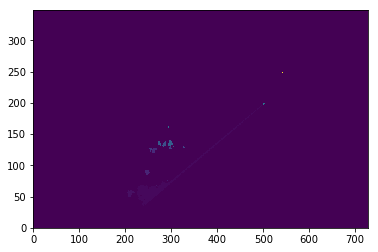

In [30]:
plt.pcolormesh(labels)

In [31]:
ploc = []
for inds in goodinds:
    
    
    locblob = trmm.isel(time=0).where(label==inds)
    locmax = locblob.where(locblob.values==locblob.max())
    ipdb.set_trace()
    

/home/ck/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  after removing the cwd from sys.path.


ValueError: dimensions () must have the same length as the number of data dimensions, ndim=2